In [1]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [10]:
#Importing required libraries
import nltk
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
from nltk.tokenize import sent_tokenize
import numpy as np
import networkx as nx
import re

#Function to split text into sentences by fullstop(.)
def read_article(text):
    
    article = text.split(". ")
    sentences =[]
    
    for sentence in article:
        print(sentence)
        sentences.append(sentence.replace("[^a-zA-Z]"," ").split(" "))
    
    return sentences

# Read the text and tokenize into sentences
def read_article(text):
    
    sentences =[]
    
    sentences = sent_tokenize(text)
    print(sent_tokenize(text))
    for sentence in sentences:
        sentence.replace("[^a-zA-Z0-9]"," ")

    return sentences
    

# Create vectors and calculate cosine similarity b/w two sentences
def sentence_similarity(sent1,sent2,stopwords=None):
    if stopwords is None:
        stopwords = []
    
    sent1 = [w.lower() for w in sent1]
    sent2 = [w.lower() for w in sent2]
    
    all_words = list(set(sent1 + sent2))
    
    vector1 = [0] * len(all_words)
    vector2 = [0] * len(all_words)
    
    #build the vector for the first sentence
    for w in sent1:
        if not w in stopwords:
            vector1[all_words.index(w)]+=1
    
    #build the vector for the second sentence
    for w in sent2:
        if not w in stopwords:
            vector2[all_words.index(w)]+=1
            
    return 1-cosine_distance(vector1,vector2)

# Create similarity matrix among all sentences
def build_similarity_matrix(sentences,stop_words):
    #create an empty similarity matrix
    similarity_matrix = np.zeros((len(sentences),len(sentences)))
    
    for idx1 in range(len(sentences)):
        for idx2 in range(len(sentences)):
            if idx1!=idx2:
                similarity_matrix[idx1][idx2] = sentence_similarity(sentences[idx1],sentences[idx2],stop_words)
                
    return similarity_matrix


# Generate and return text summary
def generate_summary(text,top_n):
    
    nltk.download('stopwords')
    nltk.download('punkt')
    
    stop_words = stopwords.words('english')
    summarize_text = []
    
    # Step1: read text and tokenize
    sentences = read_article(text)
    
    # Step2: generate similarity matrix across sentences
    sentence_similarity_matrix = build_similarity_matrix(sentences,stop_words)
    print(sentence_similarity_matrix)
    #plt.plot(sentence_similarity_matrix)
    
    # Step3: Rank sentences in similarirty matrix
    sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_matrix)
    scores = nx.pagerank(sentence_similarity_graph)
    print(scores)
    
    #Step4: sort the rank and place top sentences
    ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)),reverse=True)
    print(ranked_sentences)
    
    # Step 5: get the top n number of sentences based on rank    
    for i in range(top_n):
        summarize_text.append(ranked_sentences[i][1])
    
    # Step 6 : output the summarized version
    return " ".join(summarize_text),len(sentences)


In [11]:
generate_summary("Apple just announced plenty of rumoured products at the Spring Loaded event that took place this week. But that’s not the end, the upcoming iPhones that are still a few months away have been leaking for quite some time.We have constantly been following up on the leaks and rumours around the iPhone 13 lineup to keep you updated with the latest buzz. More recently, leaks around the iPhone 13 mini have started bubbling up at a great pace. Hence, we couldn’t hold ourselves from detailing this particular device. Despite iPhone 12 mini’s poor performance, Apple seems to have been working on a successor, a credible tipster suggested. Recently more evidence has appeared confirming the existence of the upcoming iPhone 13 mini. Last week we had seen CAD renders of the iPhone 13 mini hinting towards a different camera alignment. However, there’s no other noticeable change apart from this. Some prototype images of the iPhone 13 mini have appeared to provide more credibility to the renders surfaced online.Not just this, we have more information about the upcoming iPhone 13 mini. So, sit back and read this article to find everything we know so far about this smartphone.", 2)

['Apple just announced plenty of rumoured products at the Spring Loaded event that took place this week.', 'But that’s not the end, the upcoming iPhones that are still a few months away have been leaking for quite some time.We have constantly been following up on the leaks and rumours around the iPhone 13 lineup to keep you updated with the latest buzz.', 'More recently, leaks around the iPhone 13 mini have started bubbling up at a great pace.', 'Hence, we couldn’t hold ourselves from detailing this particular device.', 'Despite iPhone 12 mini’s poor performance, Apple seems to have been working on a successor, a credible tipster suggested.', 'Recently more evidence has appeared confirming the existence of the upcoming iPhone 13 mini.', 'Last week we had seen CAD renders of the iPhone 13 mini hinting towards a different camera alignment.', 'However, there’s no other noticeable change apart from this.', 'Some prototype images of the iPhone 13 mini have appeared to provide more credibili

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SUNIL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SUNIL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


('Some prototype images of the iPhone 13 mini have appeared to provide more credibility to the renders surfaced online.Not just this, we have more information about the upcoming iPhone 13 mini. More recently, leaks around the iPhone 13 mini have started bubbling up at a great pace.',
 10)

In [4]:
from bs4 import BeautifulSoup
import requests

In [5]:
URL = "https://hackernoon.com/will-the-game-stop-with-gamestop-or-is-this-just-the-beginning-2j1x32aa"


In [6]:
r = requests.get(URL)

In [7]:
soup = BeautifulSoup(r.text, 'html.parser')
results = soup.find_all(['h1', 'p'])
text = [result.text for result in results]
ARTICLE = ' '.join(text)

In [8]:
ARTICLE

'Will The Game Stop with Gamestop Or Is This Just The Beginning? Crypto, Markets, Trading The GameStop squeeze on short-sellers is an extraordinary event in markets, where at face value, retail traders and investors have worked together in an attempt to put some of the largest wall street institutions out of business. The events can be interpreted with many viable lenses and there are ironies baked in that are pure serendipity. There has been a centrally controlled game in the global financial system in which insiders benefited while outsiders got hurt that comes to a head with a company called GameStop. The broking firm of most of the retail side of this warfare ‘RobinHood’ is literally stealing from its poor, retail investors to give to its rich, capital backers. One of the historical realities of this game has been that macro-investing – the sages of not only portfolio management, but often also sophisticated social and cultural figures – have had a hard time making money in markets

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [05/Jun/2021 20:50:40] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [05/Jun/2021 20:50:40] "GET /static/styles.css HTTP/1.1" 304 -
127.0.0.1 - - [05/Jun/2021 20:50:41] "GET /favicon.ico HTTP/1.1" 404 -
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SUNIL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SUNIL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Will The Game Stop with Gamestop Or Is This Just The Beginning?', 'Crypto, Markets, Trading The GameStop squeeze on short-sellers is an extraordinary event in markets, where at face value, retail traders and investors have worked together in an attempt to put some of the largest wall street institutions out of business.', 'The events can be interpreted with many viable lenses and there are ironies baked in that are pure serendipity.', 'There has been a centrally controlled game in the global financial system in which insiders benefited while outsiders got hurt that comes to a head with a company called GameStop.', 'The broking firm of most of the retail side of this warfare ‘RobinHood’ is literally stealing from its poor, retail investors to give to its rich, capital backers.', 'One of the historical realities of this game has been that macro-investing – the sages of not only portfolio management, but often also sophisticated social and cultural figures – have had a hard time making 

[[0.         0.8889278  0.85111378 ... 0.92336855 0.77406274 0.86136481]
 [0.8889278  0.         0.97021553 ... 0.96935988 0.88195685 0.91690884]
 [0.85111378 0.97021553 0.         ... 0.93918736 0.87924157 0.88856793]
 ...
 [0.92336855 0.96935988 0.93918736 ... 0.         0.85411573 0.91146512]
 [0.77406274 0.88195685 0.87924157 ... 0.85411573 0.         0.85040102]
 [0.86136481 0.91690884 0.88856793 ... 0.91146512 0.85040102 0.        ]]


127.0.0.1 - - [05/Jun/2021 20:51:48] "POST /summarize HTTP/1.1" 200 -


{0: 0.007408169859775446, 1: 0.007776950700400696, 2: 0.007587126814682582, 3: 0.0077676833541477286, 4: 0.00757492271692181, 5: 0.007805299641594108, 6: 0.007680060812925225, 7: 0.0076251649887696315, 8: 0.007508976741330121, 9: 0.007608082236490519, 10: 0.007740693242551239, 11: 0.007768781824987692, 12: 0.007733979457622568, 13: 0.007623713096094153, 14: 0.007720765399123613, 15: 0.007683305073654619, 16: 0.00766307894350963, 17: 0.006434499097288506, 18: 0.007535201480584049, 19: 0.007707342704124519, 20: 0.007848295162011514, 21: 0.007647556500703523, 22: 0.00772920539358451, 23: 0.007648901557692161, 24: 0.007805222787735039, 25: 0.0076075407895054075, 26: 0.007824627884587017, 27: 0.007839698052563423, 28: 0.007789431339201415, 29: 0.007789989950540822, 30: 0.0074989748916677, 31: 0.007425430360863703, 32: 0.007703068709749575, 33: 0.006181405842355739, 34: 0.00764907332916795, 35: 0.0076945768694956255, 36: 0.0076231568885531216, 37: 0.007804545465797117, 38: 0.0075630388208401

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SUNIL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SUNIL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Will The Game Stop with Gamestop Or Is This Just The Beginning?', 'Crypto, Markets, Trading The GameStop squeeze on short-sellers is an extraordinary event in markets, where at face value, retail traders and investors have worked together in an attempt to put some of the largest wall street institutions out of business.', 'The events can be interpreted with many viable lenses and there are ironies baked in that are pure serendipity.', 'There has been a centrally controlled game in the global financial system in which insiders benefited while outsiders got hurt that comes to a head with a company called GameStop.', 'The broking firm of most of the retail side of this warfare ‘RobinHood’ is literally stealing from its poor, retail investors to give to its rich, capital backers.', 'One of the historical realities of this game has been that macro-investing – the sages of not only portfolio management, but often also sophisticated social and cultural figures – have had a hard time making 

[[0.         0.8889278  0.85111378 ... 0.92336855 0.77406274 0.86136481]
 [0.8889278  0.         0.97021553 ... 0.96935988 0.88195685 0.91690884]
 [0.85111378 0.97021553 0.         ... 0.93918736 0.87924157 0.88856793]
 ...
 [0.92336855 0.96935988 0.93918736 ... 0.         0.85411573 0.91146512]
 [0.77406274 0.88195685 0.87924157 ... 0.85411573 0.         0.85040102]
 [0.86136481 0.91690884 0.88856793 ... 0.91146512 0.85040102 0.        ]]


127.0.0.1 - - [05/Jun/2021 20:52:56] "POST /summarize1 HTTP/1.1" 200 -


{0: 0.007408221640292803, 1: 0.00777700140990415, 2: 0.0075871762502640735, 3: 0.007767736249785948, 4: 0.0075749725967530854, 5: 0.0078053526243480895, 6: 0.007680111363758024, 7: 0.007625214269937426, 8: 0.007509025605104755, 9: 0.007608133699628813, 10: 0.007740745260238233, 11: 0.007768832496970014, 12: 0.007734030806291721, 13: 0.007623765752788122, 14: 0.007720816550992084, 15: 0.007683354455204337, 16: 0.007663130334981381, 17: 0.006434535697817899, 18: 0.007535250769428719, 19: 0.0077073932620346786, 20: 0.00784834781521836, 21: 0.007647606211213044, 22: 0.007729257788921251, 23: 0.007648950364126082, 24: 0.007805275371981366, 25: 0.007607591469161644, 26: 0.007824680530039478, 27: 0.007839750278485462, 28: 0.0077894822601777885, 29: 0.007790042026908988, 30: 0.007499025832589181, 31: 0.00742547760268201, 32: 0.0077031215697549935, 33: 0.006181446897801207, 34: 0.007649125553807379, 35: 0.007694628937556626, 36: 0.007623208415664684, 37: 0.007804598456595522, 38: 0.007563088422

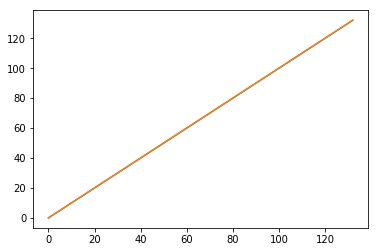

In [9]:
from flask import Flask, request, jsonify, render_template
from textsummarizer import *

app = Flask(__name__)

@app.route('/')
def home():
    return render_template('index 1.0.html')

@app.route('/summarize',methods=['POST'])
def summarize():
    
    if request.method == 'POST':
        
        URL = request.form['originalText']
        if not request.form['numOfLines']:
            numOfLines = 3
        else:
            numOfLines = int(request.form['numOfLines'])
        
        r = requests.get(URL)
        soup = BeautifulSoup(r.text, 'html.parser')
        results = soup.find_all(['h1', 'p'])
        text = [result.text for result in results]
        ARTICLE = ' '.join(text)
        
        summary, original_length = generate_summary(ARTICLE,numOfLines)
        
        return render_template('result.html',
                               text_summary=summary,
                               lines_original = original_length,
                               lines_summary = numOfLines)

@app.route('/summarize1',methods=['POST'])
def summarize1():
    
    if request.method == 'POST':
        
        ARTICLE = request.form['originalText']
        if not request.form['numOfLines']:
            numOfLines = 3
        else:
            numOfLines = int(request.form['numOfLines'])
        
       
        
        summary1, original_length = generate_summary(ARTICLE,numOfLines)
        
        return render_template('result.html',
                               text_summary=summary1,
                               lines_original = original_length,
                               lines_summary = numOfLines)
    
    
if __name__ == '__main__':
    app.run(debug=True, use_reloader=False )